In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Concatenate
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
california_housing = fetch_california_housing() # dataset from sklearn

In [3]:
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
X = california_housing["data"]
y = california_housing["target"]

In [5]:
X_train0, X_test, y_train0, y_test = train_test_split(X, y, test_size=0.2, random_state=616)

In [6]:
X_train, X_validation, y_train , y_validation = train_test_split(
    X_train0, y_train0, test_size=0.1, random_state=616
)

In [7]:
print(f" training set size: {X_train.shape, y_train.shape }")

 training set size: ((14860, 8), (14860,))


In [8]:
print(f" Evaluating set size: {X_validation.shape, y_validation.shape }")

 Evaluating set size: ((1652, 8), (1652,))


In [9]:
print(f" testing set size: {X_test.shape, y_test.shape }")

 testing set size: ((4128, 8), (4128,))


In [10]:
sc = StandardScaler()

In [11]:
X_train = sc.fit_transform(X_train)

X_validation = sc.transform(X_validation)
X_test = sc.transform(X_test)

In [12]:
input_ = Input(shape=X_train.shape[1:])
hidden_layer1 = Dense(units=50, activation="relu")(input_)
hidden_layer2 = Dense(units=10, activation="relu")(hidden_layer1)
concatenate_layer = Concatenate()([input_, hidden_layer2])
output = Dense(units=1, activation=None)(concatenate_layer)

In [13]:
model = Model(inputs= [input_], outputs= [output])

In [14]:
model.compile(
    loss= "mean_squared_error",
    optimizer="sgd",
    metrics=["mean_absolute_error"]
)

In [15]:
history  = model.fit(
    X_train, y_train, epochs=30,validation_data=(X_validation, y_validation)
)

Epoch 1/30
465/465 [==============================] - 1s 2ms/step - loss: 6.9452 - mean_absolute_error: 0.7445 - val_loss: 0.7395 - val_mean_absolute_error: 0.6068
Epoch 2/30
465/465 [==============================] - 1s 1ms/step - loss: 710.3555 - mean_absolute_error: 2.0262 - val_loss: 0.5747 - val_mean_absolute_error: 0.5566
Epoch 3/30
465/465 [==============================] - 1s 1ms/step - loss: 0.6090 - mean_absolute_error: 0.5514 - val_loss: 0.5115 - val_mean_absolute_error: 0.5210
Epoch 4/30
465/465 [==============================] - 1s 1ms/step - loss: 0.5537 - mean_absolute_error: 0.5409 - val_loss: 0.5005 - val_mean_absolute_error: 0.5144
Epoch 5/30
465/465 [==============================] - 1s 1ms/step - loss: 0.7000 - mean_absolute_error: 0.5403 - val_loss: 0.4855 - val_mean_absolute_error: 0.5152
Epoch 6/30
465/465 [==============================] - 1s 1ms/step - loss: 0.5527 - mean_absolute_error: 0.5391 - val_loss: 0.4847 - val_mean_absolute_error: 0.5126
Epoch 7/30
465

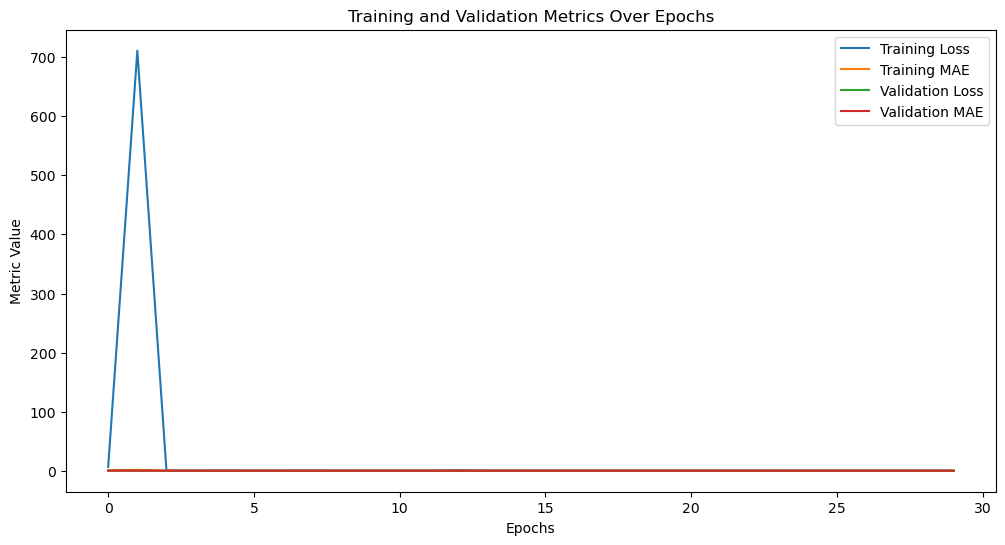

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(history.history["loss"], label="Training Loss")
ax.plot(history.history["mean_absolute_error"], label="Training MAE")
ax.plot(history.history["val_loss"], label="Validation Loss")
ax.plot(history.history["val_mean_absolute_error"], label="Validation MAE")

ax.set_xlabel("Epochs")
ax.set_ylabel("Metric Value")
ax.set_title("Training and Validation Metrics Over Epochs")
ax.legend()
plt.show()




In [17]:
model.evaluate(X_test, y_test, verbose=1)

129/129 [==============================] - 0s 1ms/step - loss: 0.5724 - mean_absolute_error: 0.5300


[0.5723984241485596, 0.5300118327140808]

In [18]:
X_train_A, X_train_B = X_train[:,6:], X_train[:, -4:]
X_validation_A, X_validation_B = X_validation[:,6:], X_validation[:, -4:]
X_test_A, X_test_B = X_test[:,6:], X_test[:, -4:]

In [19]:
input_1 = Input(shape=[2])
input_2= Input(shape=[4])
hidden_layer1 = Dense(units=50, activation="relu")(input_1)
hidden_layer2 = Dense(units=10, activation="relu")(hidden_layer1)
concatenate_layer = Concatenate()([input_2, hidden_layer2])
output = Dense(units=1, activation=None)(concatenate_layer)

In [20]:
new_model = Model(inputs = [input_1, input_2], outputs=[output])

In [21]:
new_model.compile(
    loss= "mean_squared_error",
    optimizer="sgd",
    metrics=["mean_absolute_error"]
)

In [22]:
history_new = new_model.fit(
    x=(X_train_A, X_train_B), y=y_train,epochs=30,
    validation_data=((X_validation_A,X_validation_B), y_validation)
)

Epoch 1/30
465/465 [==============================] - 1s 2ms/step - loss: 1.2037 - mean_absolute_error: 0.8126 - val_loss: 0.9049 - val_mean_absolute_error: 0.6954
Epoch 2/30
465/465 [==============================] - 1s 1ms/step - loss: 0.9545 - mean_absolute_error: 0.7340 - val_loss: 0.8847 - val_mean_absolute_error: 0.6934
Epoch 3/30
465/465 [==============================] - 1s 1ms/step - loss: 0.9104 - mean_absolute_error: 0.7213 - val_loss: 0.8647 - val_mean_absolute_error: 0.6915
Epoch 4/30
465/465 [==============================] - 1s 1ms/step - loss: 0.8987 - mean_absolute_error: 0.7132 - val_loss: 0.8643 - val_mean_absolute_error: 0.7191
Epoch 5/30
465/465 [==============================] - 1s 1ms/step - loss: 0.8869 - mean_absolute_error: 0.7116 - val_loss: 0.8574 - val_mean_absolute_error: 0.7050
Epoch 6/30
465/465 [==============================] - 1s 1ms/step - loss: 0.8810 - mean_absolute_error: 0.7075 - val_loss: 0.8827 - val_mean_absolute_error: 0.7143
Epoch 7/30
465/4

In [23]:
history_new.params

{'verbose': 1, 'epochs': 30, 'steps': 465}

In [24]:
print(history_new.history)

{'loss': [1.2036982774734497, 0.9544669985771179, 0.9103736281394958, 0.8987085223197937, 0.8869063854217529, 0.8810041546821594, 1.0509706735610962, 0.8821152448654175, 0.869356095790863, 0.9143556952476501, 0.8755275011062622, 0.8629448413848877, 0.8581820130348206, 0.8535626530647278, 0.8844841122627258, 0.9063994884490967, 0.848400354385376, 0.8478837013244629, 0.8628824949264526, 0.8490352630615234, 0.8409806489944458, 0.8435127139091492, 0.8459473848342896, 0.837235152721405, 0.9608694911003113, 0.8336058259010315, 0.9036204218864441, 0.8324710726737976, 0.8245582580566406, 0.8203912377357483], 'mean_absolute_error': [0.812583327293396, 0.7339676022529602, 0.7213355898857117, 0.7132138609886169, 0.7115801572799683, 0.7075001001358032, 0.7095733880996704, 0.7030499577522278, 0.7004401087760925, 0.699593722820282, 0.697701096534729, 0.6964804530143738, 0.6936884522438049, 0.6930223107337952, 0.693230152130127, 0.695358157157898, 0.6893298625946045, 0.6878676414489746, 0.69101965427

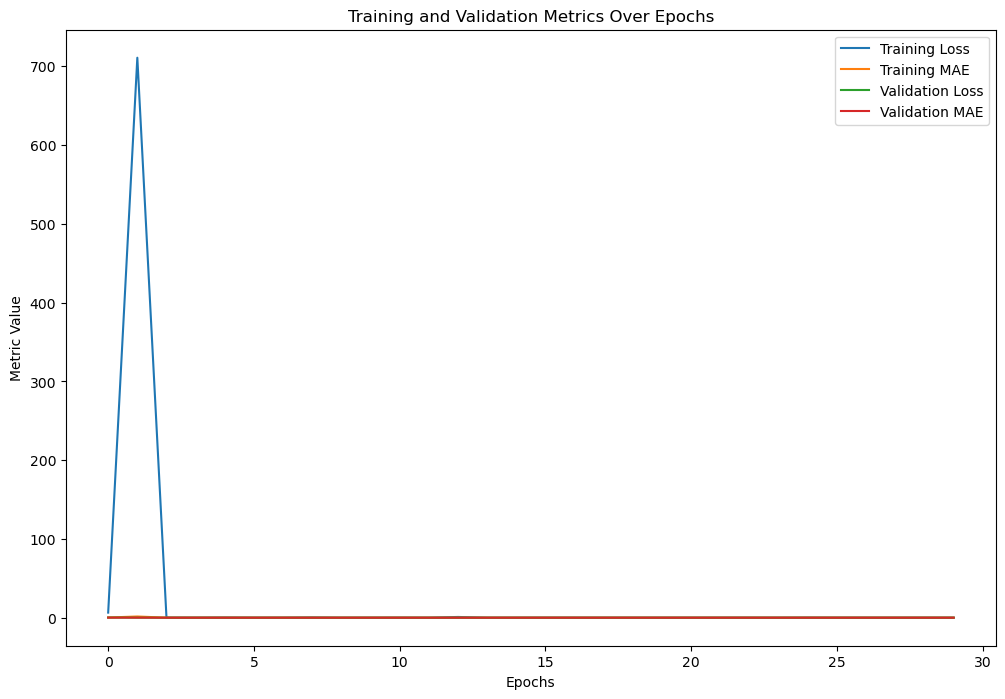

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(history.history["loss"], label="Training Loss")
ax.plot(history.history["mean_absolute_error"], label="Training MAE")
ax.plot(history.history["val_loss"], label="Validation Loss")
ax.plot(history.history["val_mean_absolute_error"], label="Validation MAE")

ax.set_xlabel("Epochs")
ax.set_ylabel("Metric Value")
ax.set_title("Training and Validation Metrics Over Epochs")
ax.legend()
plt.show()

In [26]:
new_model.evaluate(x=(X_test_A, X_test_B),
                   y= y_test,
                   verbose=0)

[0.8348752856254578, 0.6831220388412476]

In [27]:
input_1 = Input(shape=[2])
input_2= Input(shape=[4])
hidden_layer1 = Dense(units=50, activation="relu")(input_1)
hidden_layer2 = Dense(units=10, activation="relu")(hidden_layer1)
concatenate_layer = Concatenate()([input_2, hidden_layer2])
output = Dense(units=1, activation=None, name= "output")(concatenate_layer)
output_helper = Dense(units=1, activation=None, name="output_helper")(hidden_layer2)

In [28]:
model_f = Model(
    inputs = [input_1, input_2], 
    outputs = [output,output_helper]
)

In [29]:
model_f.compile(
    loss= ["mse", "mse"],
    loss_weights= [0.8, 0.2],
    optimizer="sgd",
    metrics=["mae"]
)

In [30]:
f_history = model_f.fit(
    (X_train_A, X_train_B),
    (y_train, y_train),
    epochs=30,
    validation_data=((X_validation_A, X_validation_B), (y_validation, y_validation))
)

Epoch 1/30
465/465 [==============================] - 2s 2ms/step - loss: 1.3335 - output_loss: 1.2964 - output_helper_loss: 1.4823 - output_mae: 0.8295 - output_helper_mae: 0.9058 - val_loss: 0.9438 - val_output_loss: 0.9296 - val_output_helper_loss: 1.0010 - val_output_mae: 0.7158 - val_output_helper_mae: 0.7591
Epoch 2/30
465/465 [==============================] - 1s 1ms/step - loss: 0.9700 - output_loss: 0.9603 - output_helper_loss: 1.0090 - output_mae: 0.7416 - output_helper_mae: 0.7688 - val_loss: 0.9181 - val_output_loss: 0.9133 - val_output_helper_loss: 0.9377 - val_output_mae: 0.7110 - val_output_helper_mae: 0.7290
Epoch 3/30
465/465 [==============================] - 1s 2ms/step - loss: 0.9457 - output_loss: 0.9410 - output_helper_loss: 0.9648 - output_mae: 0.7314 - output_helper_mae: 0.7470 - val_loss: 0.9070 - val_output_loss: 0.9046 - val_output_helper_loss: 0.9170 - val_output_mae: 0.6907 - val_output_helper_mae: 0.7038
Epoch 4/30
465/465 [==============================] 

In [31]:
print(f_history.history)

{'loss': [1.3335442543029785, 0.9700357913970947, 0.9457429051399231, 0.9337002038955688, 0.9246290922164917, 0.9128952026367188, 0.9150115251541138, 0.8989531397819519, 0.8834588527679443, 0.8819800615310669, 0.8737632036209106, 1.0133293867111206, 0.8652724623680115, 0.8709620237350464, 0.8610575199127197, 1.0403351783752441, 0.8710500001907349, 0.8578780889511108, 0.9484216570854187, 0.8572214841842651, 0.8492295145988464, 0.8657692074775696, 0.8452155590057373, 0.9026165008544922, 0.8710475564002991, 0.8407086730003357, 0.8425865769386292, 0.8400405645370483, 0.8344739675521851, 0.8357557058334351], 'output_loss': [1.296364426612854, 0.9602866768836975, 0.9409708976745605, 0.9306811094284058, 0.9218267798423767, 0.9098273515701294, 0.9144726991653442, 0.8962202668190002, 0.8793972134590149, 0.8793886303901672, 0.8710851669311523, 1.0465296506881714, 0.8630831837654114, 0.8711904287338257, 0.8594575524330139, 1.0842190980911255, 0.8730314373970032, 0.8569173216819763, 0.970775425434

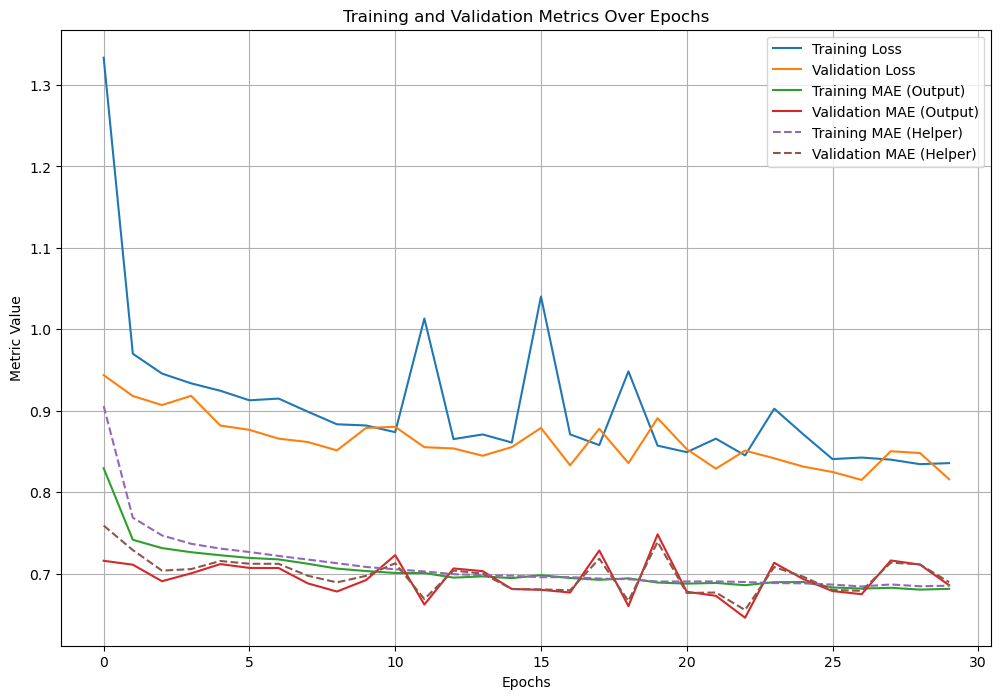

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot loss
ax.plot(f_history.history["loss"], label="Training Loss")
ax.plot(f_history.history["val_loss"], label="Validation Loss")

# Plot MAE for primary output
ax.plot(f_history.history["output_mae"], label="Training MAE (Output)")
ax.plot(f_history.history["val_output_mae"], label="Validation MAE (Output)")

ax.plot(f_history.history["output_helper_mae"], label="Training MAE (Helper)", linestyle='--')
ax.plot(f_history.history["val_output_helper_mae"], label="Validation MAE (Helper)", linestyle='--')

ax.set_xlabel("Epochs")
ax.set_ylabel("Metric Value")
ax.set_title("Training and Validation Metrics Over Epochs")
ax.legend()
plt.grid(True)
plt.show()

In [62]:
class WideAndDeepANN(keras.Model):
    def __init__(self, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden_layer1 = Dense(units=50, activation=activation)
        self.hidden_layer2 = Dense(units=10, activation=activation)
        self.final_output  = Dense(units=1)
        self.helper_output = Dense(units=1)

    def call(self, inputs):
        input_1, input_2 = inputs

        h1_output = self.hidden_layer1(input_1)
        h2_output = self.hidden_layer2(h1_output)

        concatenate_output = concatenate([input_2, h2_output])

        final_out = self.final_output(concatenate_output)
        helper_out = self.helper_output(h2_output)

        return final_out, helper_out


In [63]:
model_sub = WideAndDeepANN()

In [64]:
model_sub.compile(
    loss= ["mse", "mse"],
    loss_weights= [0.8, 0.2],
    optimizer="sgd",
    metrics=["mean_absolute_error"]
)

In [65]:
model_history = model_sub.fit(
    (X_train_A, X_train_B),
    (y_train, y_train),
    epochs=30,
    validation_data=((X_validation_A, X_validation_B), (y_validation, y_validation))
)

Epoch 1/30
465/465 [==============================] - 2s 2ms/step - loss: 1.3754 - output_1_loss: 1.3765 - output_2_loss: 1.3707 - output_1_mean_absolute_error: 0.8116 - output_2_mean_absolute_error: 0.8795 - val_loss: 0.9281 - val_output_1_loss: 0.9138 - val_output_2_loss: 0.9852 - val_output_1_mean_absolute_error: 0.7219 - val_output_2_mean_absolute_error: 0.7548
Epoch 2/30
465/465 [==============================] - 1s 1ms/step - loss: 0.9679 - output_1_loss: 0.9620 - output_2_loss: 0.9915 - output_1_mean_absolute_error: 0.7389 - output_2_mean_absolute_error: 0.7612 - val_loss: 0.9000 - val_output_1_loss: 0.8945 - val_output_2_loss: 0.9222 - val_output_1_mean_absolute_error: 0.7247 - val_output_2_mean_absolute_error: 0.7377
Epoch 3/30
465/465 [==============================] - 1s 1ms/step - loss: 0.9286 - output_1_loss: 0.9243 - output_2_loss: 0.9461 - output_1_mean_absolute_error: 0.7266 - output_2_mean_absolute_error: 0.7391 - val_loss: 0.8836 - val_output_1_loss: 0.8808 - val_outp

In [67]:
model_f.save("Califirnia_reg_f.h5")

In [68]:
model_reg_calif = keras.models.load_model("Califirnia_reg_f.h5")

In [69]:
model_reg_calif.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 50)           150         ['input_4[0][0]']                
                                                                                                  
 input_5 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 10)           510         ['dense_6[0][0]']                
                                                                                            

In [70]:
model_sub.summary()

Model: "wide_and_deep_ann_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            multiple                  150       
                                                                 
 dense_37 (Dense)            multiple                  510       
                                                                 
 dense_38 (Dense)            multiple                  15        
                                                                 
 dense_39 (Dense)            multiple                  11        
                                                                 
Total params: 686
Trainable params: 686
Non-trainable params: 0
_________________________________________________________________


In [71]:
model_sub.save("reg_model_sub.h5") # we can only save weights 

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.